# Projeto: Emissão Acústica Petrobras
## Laboratório de Processamento de Sinais - UFRJ
## Autor: Natanael Junior (natmourajr@lps.ufrj.br)

O objetivo deste notebook é o treinamento e análise de um modelo baseado em redes neurais artificiais aplicado aos dados do projeto 

In [2]:
# Carregando dados
import scipy.io as sio
import numpy as np
mat_contents = sio.loadmat('../../Data/dadosCP3.mat')

inputMatrix = mat_contents['inputMatrix']
fieldNames = mat_contents['fieldNames']
freqPower = mat_contents['power']
normalizedfreqPower = mat_contents['normalizedPower']

feature_labels = []

for x1, x2 in enumerate(fieldNames):
    for y1, y2 in enumerate(x2):
        feature_labels = np.append(feature_labels,str(y2[0])) 


inputs = inputMatrix.T


target_file = sio.loadmat('../../Data/targetCP3.mat')
target = target_file['targetCP3']
target = np.argmax(target,axis=0)
outputs = target

cat_outputs = -np.ones([outputs.shape[0],len(np.unique(outputs))])
for i,j in enumerate(outputs):
    cat_outputs[i,j] = 1
    
class_labels = ['NP', 'SP', 'UP']

In [4]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn import preprocessing
from sklearn.externals import joblib

import os
from Functions import models

n_folds = 10

folds_selection = "StratifiedKFolds" # "StratifiedKFolds", "KFolds"

folds_filename =  '../Results/%s_%i_folds.jbl'%(folds_selection,n_folds)
#folds_filename =  '../Results/KFolds_%i_folds.jbl'%(n_folds)

if not os.path.isfile(folds_filename):
    if folds_selection == "StratifiedKFolds":
        skf = StratifiedKFold(n_splits=n_folds, shuffle=True)
        skf.get_n_splits(inputs, outputs)
        joblib.dump(skf, folds_filename)
    elif folds_selection == "KFolds":
        skf = KFold(n_splits=n_folds, shuffle=True)
        skf.get_n_splits(inputs, outputs)
        joblib.dump(skf, folds_filename)
else:
    skf = joblib.load(folds_filename)

nn_models = {}
n_neurons = 20
nn_params = models.NeuralNetworkParams(learning_rate=0.01,
                                       n_epochs=400,
                                       batch_size=40,
                                       verbose=True, 
                                       n_inits=4)

for ifold, [train_index, test_index] in enumerate(skf.split(inputs, outputs)):
    #if ifold > 0:        
    #    continue
    
    #normalize data
    scaler = preprocessing.StandardScaler().fit(inputs[train_index,:])
    normalized_inputs = scaler.transform(inputs)
    
    nn_models[ifold] = models.NeuralNetworkModel()
    
    nn_models[ifold].loss = 'categorical_crossentropy'
    nn_models[ifold].optimizer = 'rmsprop'
    
    nn_models[ifold].fit(inputs=normalized_inputs, 
                         outputs=cat_outputs,
                         train_indexes=[train_index, test_index],
                         n_neurons=n_neurons, trn_params=nn_params, 
                         activation_functions=['relu', 'softmax'])
    nn_models[ifold].save('%s_%i_neurons_%i_fold'%(nn_models[ifold].get_str(), 
                                                   n_neurons,ifold),
                          '../Results/NeuralNetwork')

Neural Network Model - train 1 initialization
min loss: 9999.00000, model loss: 0.92486
Neural Network Model - train 2 initialization
Neural Network Model - train 3 initialization
min loss: 0.92486, model loss: 0.91892
Neural Network Model - train 4 initialization
Neural Network Model - train 1 initialization
min loss: 9999.00000, model loss: 0.92024
Neural Network Model - train 2 initialization
Neural Network Model - train 3 initialization
Neural Network Model - train 4 initialization
min loss: 0.92024, model loss: 0.91640
Neural Network Model - train 1 initialization
min loss: 9999.00000, model loss: 0.90311
Neural Network Model - train 2 initialization
Neural Network Model - train 3 initialization
min loss: 0.90311, model loss: 0.90093
Neural Network Model - train 4 initialization
Neural Network Model - train 1 initialization
min loss: 9999.00000, model loss: 0.90137
Neural Network Model - train 2 initialization
min loss: 0.90137, model loss: 0.89605
Neural Network Model - train 3 i

In [12]:
folds_filename

'../Results/KFolds_4_folds.jbl'

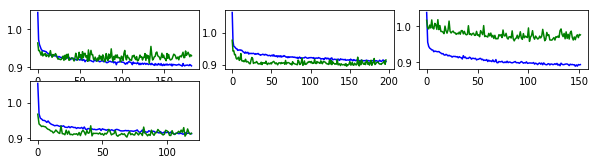

In [28]:
# Train analysis
import numpy as np
from sklearn import datasets
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn import preprocessing
from sklearn.externals import joblib

import matplotlib.pyplot as plt
%matplotlib inline

import os
from Functions import models

n_folds = 10
folds_selection = "StratifiedKFolds" # "StratifiedKFolds", "KFolds"
folds_filename =  '../Results/%s_%i_folds.jbl'%(folds_selection,n_folds)

if os.path.isfile(folds_filename):
    skf = joblib.load(folds_filename)
    
    nn_load_models = {}
    n_neurons = 20
    nn_params = models.NeuralNetworkParams(learning_rate=0.01,
                                           n_epochs=400,
                                           batch_size=40,
                                           verbose=True, 
                                           n_inits=4)
    
    fig = plt.figure(figsize=(10,5))
    nrows = 4
    ncols = 3
    
    for ifold, [train_index, test_index] in enumerate(skf.split(inputs, outputs)):
        #normalize data
        scaler = preprocessing.StandardScaler().fit(inputs[train_index,:])
        normalized_inputs = scaler.transform(inputs)
    
        nn_load_models[ifold] = models.NeuralNetworkModel()
    
        nn_load_models[ifold].loss = 'categorical_crossentropy'
        nn_load_models[ifold].optimizer = 'sgd'
        
        nn_load_models[ifold].trn_params = models.NeuralNetworkParams()
    
        nn_load_models[ifold].load('%s_%i_neurons_%i_fold'%(nn_models[ifold].get_str(),
                                                       n_neurons,ifold),
                              '../Results/NeuralNetwork')

        ax = plt.subplot(nrows,ncols,ifold+1)
        epochs = range(len(nn_load_models[ifold].trn_desc[0]['acc']))
        ax.plot(epochs,nn_load_models[ifold].trn_desc[0]['loss'],'b')
        ax.plot(epochs,nn_load_models[ifold].trn_desc[0]['val_loss'],'g')
        fig.subplots_adjust(wspace=0.15, hspace=0.2)
    
else:
    print "No Training"



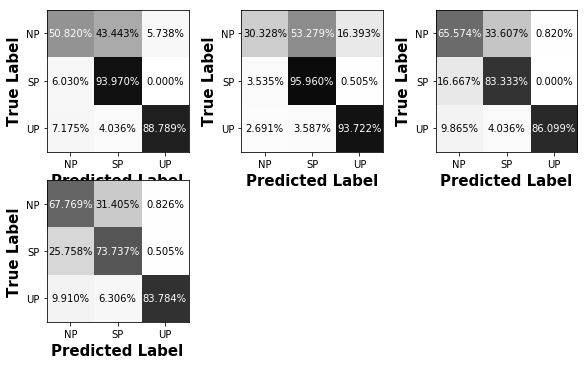

In [29]:
# Train analysis
import numpy as np
from sklearn import datasets
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn import preprocessing
from sklearn.externals import joblib

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline

import os
from Functions import models

n_folds = 10
folds_selection = "StratifiedKFolds" # "StratifiedKFolds", "KFolds"
folds_filename =  '../Results/%s_%i_folds.jbl'%(folds_selection,n_folds)

if os.path.isfile(folds_filename):
    skf = joblib.load(folds_filename)
    
    nn_load_models = {}
    cm = {}
    cm_normalized = {}
    n_neurons = 20
    nn_params = models.NeuralNetworkParams(learning_rate=0.01,
                                           n_epochs=400,
                                           batch_size=40,
                                           verbose=True, 
                                           n_inits=4)
    
    fig = plt.figure(figsize=(10,12))
    nrows = 4
    ncols = 3
    
    for ifold, [train_index, test_index] in enumerate(skf.split(inputs, outputs)):
        #normalize data
        scaler = preprocessing.StandardScaler().fit(inputs[train_index,:])
        normalized_inputs = scaler.transform(inputs)
    
        nn_load_models[ifold] = models.NeuralNetworkModel()
    
        nn_load_models[ifold].loss = 'categorical_crossentropy'
        nn_load_models[ifold].optimizer = 'sgd'
        
        nn_load_models[ifold].trn_params = models.NeuralNetworkParams()
    
        nn_load_models[ifold].load('%s_%i_neurons_%i_fold'%(nn_models[ifold].get_str(),
                                                       n_neurons,ifold),
                              '../Results/NeuralNetwork')

        model_output = nn_load_models[ifold].predict(normalized_inputs)
        model_classif = np.argmax(model_output,axis=1)
        
        cm[ifold] = confusion_matrix(target[test_index], model_classif[test_index])
        cm[ifold] = cm[ifold].astype('float')/ cm[ifold].sum(axis=1)[:, np.newaxis]
        cm_normalized[ifold] = 100.*cm[ifold]
        
        ax = plt.subplot(nrows,ncols,ifold+1)
        
        im = ax.imshow(cm_normalized[ifold], 
                       interpolation='nearest', 
                       cmap=plt.cm.Greys,clim=(0.0, 100.0))
        
        
        width, height = cm_normalized[ifold].shape

        for x in xrange(width):
            for y in xrange(height):
                if cm_normalized[ifold][x][y] < 50.:
                    ax.annotate('%1.3f%%'%(cm_normalized[ifold][x][y]), xy=(y, x),
                                horizontalalignment='center',
                                verticalalignment='center')
                else:
                    ax.annotate('%1.3f%%'%(cm_normalized[ifold][x][y]), xy=(y, x),
                                horizontalalignment='center',
                                verticalalignment='center',color='white')
                    
        tick_marks = np.arange(len(class_labels))
        ax.xaxis.set_ticks(tick_marks)
        ax.xaxis.set_ticklabels(class_labels)

        ax.yaxis.set_ticks(tick_marks)
        ax.yaxis.set_ticklabels(class_labels)

        ax.set_ylabel('True Label',fontweight='bold',fontsize=15)
        ax.set_xlabel('Predicted Label',fontweight='bold',fontsize=15)
        
        fig.subplots_adjust(wspace=0.15, hspace=0.2)

else:
    print "No Training"


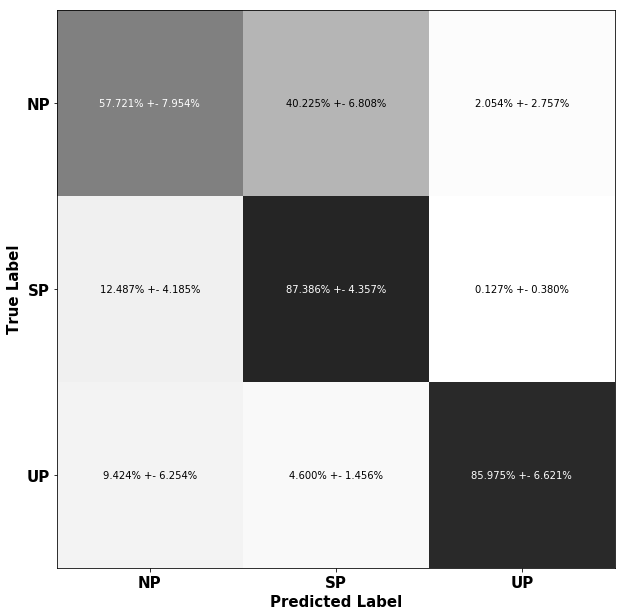

In [5]:
# Train analysis
import numpy as np
from sklearn import datasets
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
from sklearn.externals import joblib

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline

import os
from Functions import models

n_folds = 10
folds_selection = "StratifiedKFolds" # "StratifiedKFolds", "KFolds"
folds_filename =  '../Results/%s_%i_folds.jbl'%(folds_selection,n_folds)

if os.path.isfile(folds_filename):
    skf = joblib.load(folds_filename)
    
    nn_load_models = {}
    cm = {}
    cm_normalized = {}
    n_neurons = 20
    nn_params = models.NeuralNetworkParams(learning_rate=0.01,
                                           n_epochs=400,
                                           batch_size=40,
                                           verbose=True, 
                                           n_inits=4)
    
    fig = plt.figure(figsize=(10,12))
    nrows = 1
    ncols = 1
    
    for ifold, [train_index, test_index] in enumerate(skf.split(inputs, outputs)):
        #normalize data
        scaler = preprocessing.StandardScaler().fit(inputs[train_index,:])
        normalized_inputs = scaler.transform(inputs)
    
        nn_load_models[ifold] = models.NeuralNetworkModel()
    
        nn_load_models[ifold].loss = 'categorical_crossentropy'
        nn_load_models[ifold].optimizer = 'rmsprop'
        
        nn_load_models[ifold].trn_params = models.NeuralNetworkParams()
    
        nn_load_models[ifold].load('%s_%i_neurons_%i_fold'%(nn_models[ifold].get_str(),
                                                       n_neurons,ifold),
                              '../Results/NeuralNetwork')

        model_output = nn_load_models[ifold].predict(normalized_inputs)
        model_classif = np.argmax(model_output,axis=1)
        
        cm[ifold] = confusion_matrix(target[test_index], model_classif[test_index])
        cm[ifold] = cm[ifold].astype('float')/ cm[ifold].sum(axis=1)[:, np.newaxis]
        cm_normalized[ifold] = 100.*cm[ifold]
        
    ax = plt.subplot(nrows,ncols,1)

    cm_mean = np.mean([cm_normalized[key] for key in cm_normalized],axis=0)
    cm_std = np.std([cm_normalized[key] for key in cm_normalized],axis=0)
    
    im = ax.imshow(cm_mean, 
                   interpolation='nearest', 
                   cmap=plt.cm.Greys,clim=(0.0, 100.0))
        
    width, height = cm_mean.shape

    for x in xrange(width):
        for y in xrange(height):
            if cm_mean[x][y] < 50.:
                ax.annotate('%1.3f%% +- %1.3f%%'%(cm_mean[x][y],
                                                  cm_std[x][y]), 
                            xy=(y, x),
                            horizontalalignment='center',
                            verticalalignment='center')
            else:
                ax.annotate('%1.3f%% +- %1.3f%%'%(cm_mean[x][y],
                                                  cm_std[x][y]), 
                            xy=(y, x),
                            horizontalalignment='center',
                            verticalalignment='center', color='white')
                    
    tick_marks = np.arange(len(class_labels))
    ax.xaxis.set_ticks(tick_marks)
    ax.xaxis.set_ticklabels(class_labels,fontweight='bold',fontsize=15)

    ax.yaxis.set_ticks(tick_marks)
    ax.yaxis.set_ticklabels(class_labels,fontweight='bold',fontsize=15)

    ax.set_ylabel('True Label',fontweight='bold',fontsize=15)
    ax.set_xlabel('Predicted Label',fontweight='bold',fontsize=15)
        
else:
    print "No Training"



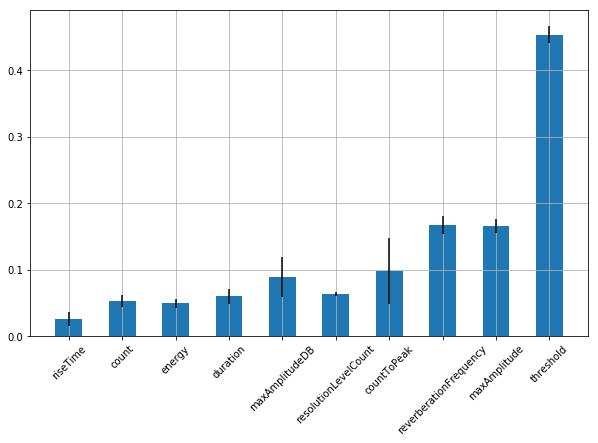

In [10]:
# Train analysis
import numpy as np
from sklearn import datasets
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn import preprocessing
from sklearn.externals import joblib

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline

import os
from Functions import models

n_folds = 4
folds_selection = "StratifiedKFolds" # "StratifiedKFolds", "KFolds"
folds_filename =  '../Results/%s_%i_folds.jbl'%(folds_selection,n_folds)

if os.path.isfile(folds_filename):
    skf = joblib.load(folds_filename)
    
    nn_load_models = {}
    cm = {}
    cm_normalized = {}
    ref_eff_mat = np.zeros([n_folds])
    eff_mat = np.zeros([n_folds,inputs.shape[1]])
    
    n_neurons = 20
    nn_params = models.NeuralNetworkParams(learning_rate=0.01,
                                           n_epochs=400,
                                           batch_size=40,
                                           verbose=True, 
                                           n_inits=4)
    
    fig, ax = plt.subplots(figsize=(10,6))
    nrows = 4
    ncols = 3
    
    for ifold, [train_index, test_index] in enumerate(skf.split(inputs, outputs)):
        #normalize data
        scaler = preprocessing.StandardScaler().fit(inputs[train_index,:])
        normalized_inputs = scaler.transform(inputs)
    
        nn_load_models[ifold] = models.NeuralNetworkModel()
    
        nn_load_models[ifold].loss = 'categorical_crossentropy'
        nn_load_models[ifold].optimizer = 'sgd'
        
        nn_load_models[ifold].trn_params = models.NeuralNetworkParams()
    
        nn_load_models[ifold].load('%s_%i_neurons_%i_fold'%(nn_models[ifold].get_str(),
                                                       n_neurons,ifold),
                              '../Results/NeuralNetwork')
        
        model_output = nn_load_models[ifold].predict(normalized_inputs)
        model_classif = np.argmax(model_output,axis=1)
        
        cm = confusion_matrix(target[test_index], model_classif[test_index])

        cm = cm.astype('float')/ cm.sum(axis=1)[:, np.newaxis]
        ref_eff_mat[ifold] = np.mean([cm[i,i] for i in range(cm.shape[0])])
        ref_eff_mat = ref_eff_mat.reshape((ref_eff_mat.shape[0], 1))
        
        for i in range(normalized_inputs.shape[1]):
            aux = normalized_inputs
            aux[:,i] = np.mean(aux[:,i])*np.ones_like(aux[:,i])
            model_output = nn_load_models[ifold].predict(aux)
            model_classif = np.argmax(model_output,axis=1)
            
            cm = confusion_matrix(target[test_index], model_classif[test_index])
            cm = cm.astype('float')/ cm.sum(axis=1)[:, np.newaxis]
            eff_mat[ifold,i] = np.mean([cm[l,l] for l in range(cm.shape[0])])
        

    delta_eff = np.matlib.repmat(ref_eff_mat,1, eff_mat.shape[1]) - eff_mat 
    delta_eff = delta_eff

    delta_eff_mean = np.mean(delta_eff, axis=0)
    delta_eff_std = np.std(delta_eff, axis=0)
    
    ax.bar(np.arange(normalized_inputs.shape[1]), delta_eff_mean, 0.5, yerr = delta_eff_std)
    ax.set_xticks(range(feature_labels.shape[0]))
    ax.set_xticklabels(feature_labels,rotation=45)
    ax.grid()

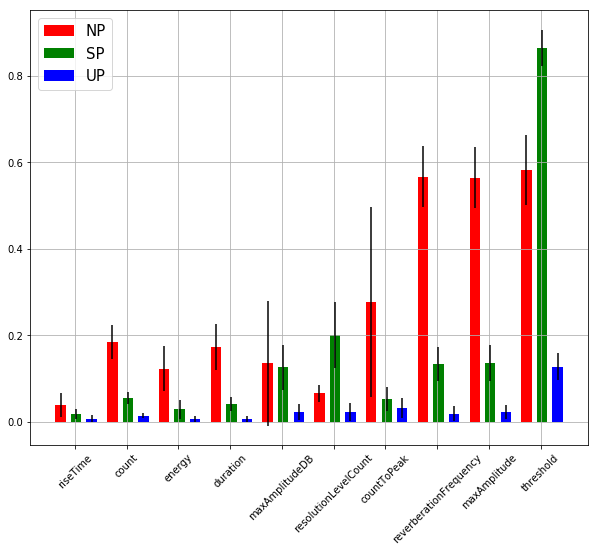

In [8]:
# Train analysis
import numpy as np
from sklearn import datasets
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn import preprocessing
from sklearn.externals import joblib

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline

import os
from Functions import models

n_folds = 4
folds_selection = "StratifiedKFolds" # "StratifiedKFolds", "KFolds"
folds_filename =  '../Results/%s_%i_folds.jbl'%(folds_selection,n_folds)

m_colors = ['r', 'g', 'b']

if os.path.isfile(folds_filename):
    skf = joblib.load(folds_filename)
    
    nn_load_models = {}
    cm = {}
    cm_normalized = {}
    ref_eff_mat = np.zeros([n_folds])
    ref_eff_mat_class = np.zeros([n_folds, np.max(target)+1])
    eff_mat = np.zeros([n_folds,inputs.shape[1]])
    eff_mat_class = np.zeros([n_folds, inputs.shape[1], np.max(target)+1])
    n_neurons = 20
    nn_params = models.NeuralNetworkParams(learning_rate=0.01,
                                           n_epochs=400,
                                           batch_size=40,
                                           verbose=True, 
                                           n_inits=4)
    
    fig, ax = plt.subplots(figsize=(10,8))
    nrows = 4
    ncols = 3
    
    for ifold, [train_index, test_index] in enumerate(skf.split(inputs, outputs)):
        #normalize data
        scaler = preprocessing.StandardScaler().fit(inputs[train_index,:])
        normalized_inputs = scaler.transform(inputs)
    
        nn_load_models[ifold] = models.NeuralNetworkModel()
    
        nn_load_models[ifold].loss = 'categorical_crossentropy'
        nn_load_models[ifold].optimizer = 'sgd'
        
        nn_load_models[ifold].trn_params = models.NeuralNetworkParams()
    
        nn_load_models[ifold].load('%s_%i_neurons_%i_fold'%(nn_models[ifold].get_str(),
                                                       n_neurons,ifold),
                              '../Results/NeuralNetwork')
        
        model_output = nn_load_models[ifold].predict(normalized_inputs)
        model_classif = np.argmax(model_output,axis=1)
        
        cm = confusion_matrix(target[test_index], model_classif[test_index])

        cm = cm.astype('float')/ cm.sum(axis=1)[:, np.newaxis]
        ref_eff_mat[ifold] = np.mean([cm[i,i] for i in range(cm.shape[0])])
        ref_eff_mat = ref_eff_mat.reshape((ref_eff_mat.shape[0], 1))
        
        for iclass in range(np.max(target)+1):
            ref_eff_mat_class[ifold, iclass] = cm[iclass, iclass]

        
        
        for i in range(normalized_inputs.shape[1]):
            aux = normalized_inputs
            aux[:,i] = np.mean(aux[:,i])*np.ones_like(aux[:,i])
            model_output = nn_load_models[ifold].predict(aux)
            model_classif = np.argmax(model_output,axis=1)
            
            cm = confusion_matrix(target[test_index], model_classif[test_index])
            cm = cm.astype('float')/ cm.sum(axis=1)[:, np.newaxis]
            eff_mat[ifold,i] = np.mean([cm[l,l] for l in range(cm.shape[0])])
            eff_mat_class[ifold, i, np.arange(np.max(target)+1)] = ([cm[l,l] for l in range(cm.shape[0])])
        

    delta_eff = eff_mat - np.matlib.repmat(ref_eff_mat,1, eff_mat.shape[1])
    delta_eff = np.abs(delta_eff)

    delta_eff_mean = np.mean(delta_eff, axis=0)
    delta_eff_std = np.std(delta_eff, axis=0)
    
#     ax.bar(np.arange(normalized_inputs.shape[1]), delta_eff_mean, 0.5, yerr = delta_eff_std)
#     ax.set_xticks(range(feature_labels.shape[0]))
#     ax.set_xticklabels(feature_labels,rotation=45)
#     ax.grid()
    
#     fig1, ax1 = plt.subplots(figsize=(10,10))
    for k in range(eff_mat_class.shape[2]):
        dist = k*0.3
        delta_eff_class = eff_mat_class[:,:,k] - np.matlib.repmat(ref_eff_mat_class[:,k].reshape((4,1)),1, eff_mat_class.shape[1])
        delta_eff_class = np.abs(delta_eff_class)
        
        delta_eff_class_mean = np.mean(delta_eff_class, axis=0)
        delta_eff_class_std = np.std(delta_eff_class, axis=0)
    
        ax.bar(np.arange(normalized_inputs.shape[1])+dist, delta_eff_class_mean, 0.2, 
               yerr=delta_eff_class_std,color=m_colors[k], label=class_labels[k])
    ax.set_xticks(np.arange(feature_labels.shape[0])+0.275)
    ax.set_xticklabels(feature_labels,rotation=45)
    ax.grid()
    ax.legend(loc='best', fontsize=15)